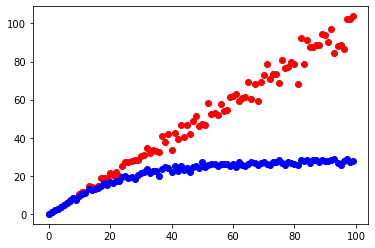

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import seaborn as sns


# This is a basic test of how the residuals
# might differ as y is regressed on x versus if x is regressed on y
# This basically explores how horizontal deviations in the OLS
# regression are different depending on the variables, even in the two variable case.
n = 100

xy = np.zeros(n)
yx = np.zeros(n)

seq = np.array([i for i in range(n)])
formula = "y ~ x"

for i in range(n):
    x = np.array([i for i in range(100)])
    y = x + np.random.normal(0, i, 100)
    
    x_with_intercept = sm.add_constant(x)
    results = sm.OLS(y, x_with_intercept).fit()
    rmse_residuals = np.sqrt(results.mse_resid)
    
    xy[i] = rmse_residuals
    #xy[i] = results.bse[1]
    
    y_with_intercept = sm.add_constant(y)
    results = sm.OLS(x, y_with_intercept).fit()
    rmse_residuals = np.sqrt(results.mse_resid)
    
    yx[i] = rmse_residuals
    #yx[i] = results.bse[1]

plt.scatter(seq, xy, color='red')
plt.scatter(seq, yx, color='blue')

(-10.0, 10.0)

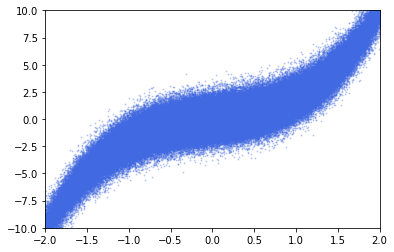

In [42]:
# This is a test of additive noise models
# The paper can be found: http://philsci-archive.pitt.edu/15984/1/Causal%20Inference%20from%20Noise.pdf
# Essentially, what they are doing is they are saying they can determine causality from two variables only
# Through looking at the noise and assuming that the noise is not symmetric
# That is to say, p(y|x) does not equal p(x|y), perhaps due to some non-linearities within
# the causal mechanism. Here, the more gaussian distributions mean that they are more likely to be
# the causal mechanism.

n = 250000
x = np.random.normal(0, 1, 250000)
y = x + x**3 + np.random.normal(0, 1, 250000)
plt.scatter(x, y, color='royalblue', alpha=0.25, s=1)
plt.xlim([-2, 2])
plt.ylim([-10, 10])

In [52]:
z = y[(x > 0.95) & (x < 1.05)]

(array([  1.,   1.,   0.,   1.,   0.,   2.,   1.,   2.,   6.,   1.,   2.,
          4.,   8.,   6.,  12.,   6.,  17.,  25.,  14.,  17.,  19.,  37.,
         38.,  38.,  49.,  71.,  57.,  49.,  67.,  77.,  96.,  90.,  81.,
        101., 113., 128., 113., 124., 132., 142., 111., 161., 181., 168.,
        166., 171., 176., 156., 171., 149., 167., 140., 163., 132., 133.,
        152., 140., 142., 122., 117., 101.,  97., 115.,  86.,  91.,  85.,
         86.,  79.,  53.,  55.,  44.,  45.,  34.,  32.,  40.,  28.,  24.,
         25.,  21.,  13.,  17.,   9.,   6.,  11.,   5.,   5.,   8.,   3.,
          3.,   2.,   2.,   0.,   0.,   4.,   0.,   2.,   1.,   1.,   0.,
          1.]),
 array([-1.40566158e+00, -1.33515855e+00, -1.26465551e+00, -1.19415247e+00,
        -1.12364943e+00, -1.05314640e+00, -9.82643360e-01, -9.12140322e-01,
        -8.41637285e-01, -7.71134248e-01, -7.00631211e-01, -6.30128174e-01,
        -5.59625137e-01, -4.89122100e-01, -4.18619063e-01, -3.48116025e-01,
        -2.776

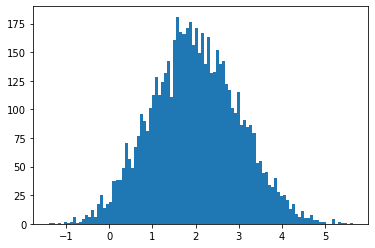

In [55]:
plt.hist(z, bins=100)

(array([ 2.,  1.,  5.,  5.,  5.,  4., 11.,  4.,  8., 10.,  8., 16.,  9.,
        18., 18., 25., 18., 20., 16., 22., 22., 30., 28., 27., 25., 32.,
        47., 41., 38., 39., 51., 55., 50., 46., 47., 47., 57., 55., 57.,
        57., 51., 51., 56., 68., 72., 76., 66., 55., 65., 65., 49., 57.,
        63., 69., 71., 72., 70., 82., 60., 86., 89., 96., 66., 97., 72.,
        77., 78., 81., 74., 61., 62., 75., 77., 64., 73., 66., 62., 53.,
        53., 52., 48., 33., 34., 40., 33., 23., 19., 11., 15.,  8., 10.,
        10.,  5.,  4.,  4.,  5.,  1.,  2.,  1.,  1.]),
 array([-0.91806194, -0.89493804, -0.87181414, -0.84869024, -0.82556634,
        -0.80244244, -0.77931854, -0.75619464, -0.73307074, -0.70994684,
        -0.68682294, -0.66369904, -0.64057514, -0.61745124, -0.59432734,
        -0.57120344, -0.54807954, -0.52495564, -0.50183174, -0.47870784,
        -0.45558394, -0.43246004, -0.40933614, -0.38621224, -0.36308834,
        -0.33996444, -0.31684053, -0.29371663, -0.27059273, -0.247468

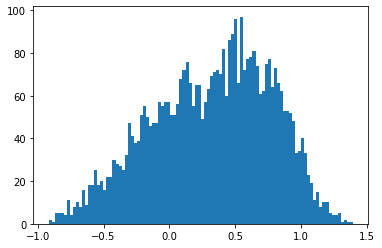

In [56]:
a = x[(y > 0.95) & (y < 1.05)]
plt.hist(a, bins=100)